<h3>NFL Game Simulation - Basic Example</h3>

<p>
  <b>Description</b>: Estimate Win Probabilities based on Points For and Points Against from the Regular Season.
</p>

<p>
  <b>Question(s)</b>: Which team has the better chance of winning the game?
</p>

<br />
<br />
<br />

In [41]:
import random

import numpy as np
import pandas as pd
from scipy.stats import norm

In [49]:
year = 2022

## tuples
playoff_schedule = [
    ('Kansas City Chiefs', 'Cincinnati Bengals')
]

In [58]:
df = pd.read_csv(f'../../data/nfl/pfr-{year}-games.csv')


regular_season = pd.concat(
    [
        df[['Week', 'Winner/tie', 'Pts', 'Pts.1']].rename(columns={
            'Week': 'week',
            'Winner/tie': 'team',
            'Pts': 'pf',
            'Pts.1': 'pa',
        }),
        df[['Week', 'Loser/tie', 'Pts', 'Pts.1']].rename(columns={
            'Week': 'week',
            'Loser/tie': 'team',
            'Pts.1': 'pf',
            'Pts': 'pa',
        }),
    ]
).sort_values(['week'])

regular_season.head()

,week,team,pf,pa
0,1,Buffalo Bills,31,10
13,1,Las Vegas Raiders,19,24
12,1,Tennessee Titans,20,21
11,1,Green Bay Packers,7,23
10,1,Arizona Cardinals,21,44


In [51]:
regular_season.describe()

,week,pf,pa
count,542.000000,542.000000,542.000000
mean,9.450185,21.881919,21.881919
std,5.292578,9.307883,9.307883
min,1.000000,0.000000,0.000000
25%,5.000000,16.000000,16.000000
50%,9.000000,21.000000,21.000000
75%,14.000000,27.000000,27.000000
max,18.000000,54.000000,54.000000


In [52]:
ratings = regular_season.groupby('team').mean()[['pf', 'pa']]
ratings.loc['Cincinnati Bengals']

pf    26.125
pa    20.125
Name: Cincinnati Bengals, dtype: float64

In [53]:
avg_points = regular_season['pf'].mean()
score_std = regular_season['pf'].std()

print(avg_points, score_std)

21.881918819188193 9.307882574027339


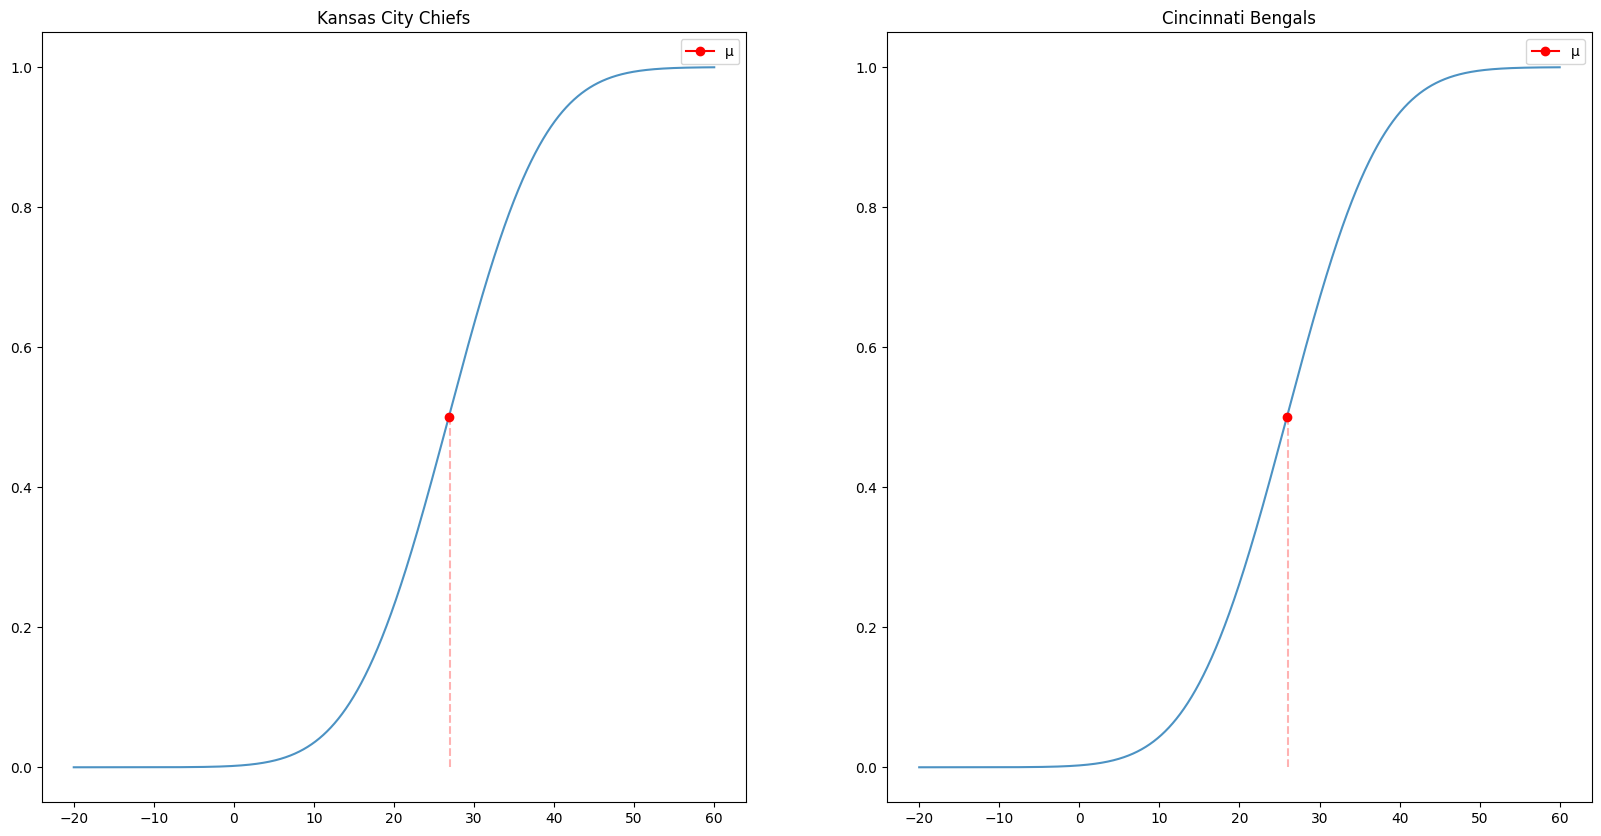

In [54]:
import matplotlib.pyplot as plt

def plot_game_cdfs(t1, t2):

  t1_pf, t1_pa = ratings.loc[t1][['pf', 'pa']]
  t2_pf, t2_pa = ratings.loc[t2][['pf', 'pa']]

  _, ax = plt.subplots(1, 2, figsize=(20, 10))

  x = np.linspace(-20, 60, 10000)
  team1_mu = (t1_pf * t2_pa) / avg_points
  vals_1 = norm.cdf(x, team1_mu, score_std)

  ax[0].set_title(t1)
  ax[0].plot(x, vals_1, alpha=.8)
  ax[0].plot(team1_mu, .5, color='red', label='μ', marker='o')
  ax[0].vlines([team1_mu+.1], 0, .5, colors='red', alpha=.3, linestyles='dashed')
  ax[0].legend()

  team2_mu = (t2_pf * t1_pa) / avg_points
  vals_2 = norm.cdf(x, team2_mu, score_std)

  ax[1].set_title(t2)
  ax[1].plot(x, vals_2, alpha=.8)
  ax[1].plot(team2_mu, .5, color='red', label='μ', marker='o')
  ax[1].vlines([team2_mu+.1], 0, .5, colors='red', alpha=.3, linestyles='dashed')
  ax[1].legend()

  plt.show()

plot_game_cdfs(
  'Kansas City Chiefs',
  'Indianapolis Colts'
)

In [55]:
avg_points = regular_season['pf'].mean()
score_std = regular_season['pf'].std()

def play_game(t1, t2):

  t1_pf, t1_pa = ratings.loc[t1][['pf', 'pa']]
  t2_pf, t2_pa = ratings.loc[t2][['pf', 'pa']]

  team1_mu = (t1_pf * t2_pa) / avg_points
  team2_mu = (t2_pf * t1_pa) / avg_points

  return (
    round(norm.ppf(random.random(), team1_mu, score_std), 2),
    round(norm.ppf(random.random(), team2_mu, score_std), 2),
  )

simulations = 10000

print('-' * 100)

for team1, team2 in playoff_schedule:

  scores = [
    play_game(team1, team2)
    for _ in range(simulations)
  ]

  t1_wins = sum(score[0] > score[1] for score in scores)

  t1_win_percentage = t1_wins / simulations
  t2_win_percentage = 1 - t1_win_percentage

  print(f'{team1}: {round(t1_win_percentage * 100, 2)}')
  print(f'{team2}: {round(t2_win_percentage * 100, 2)}')
  print('-' * 100)

----------------------------------------------------------------------------------------------------


Kansas City Chiefs: 53.79
Cincinnati Bengals: 46.21
----------------------------------------------------------------------------------------------------
